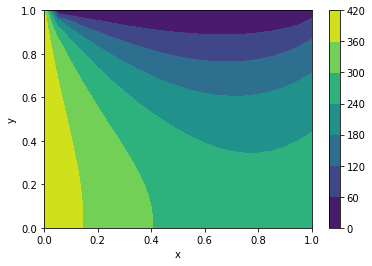

In [10]:
def differencesFinies(NPI,NPJ,coeff,dx2m,dy2m,dx,h,k,TA,A,b):
    for i in range( 0 ,NPI):
        for j in range( 0 ,NPJ) :
            p = j*    (NPI)    + i
            pE= j*    (NPI)    + i+1
            pO= j*    (NPI)    + i-1 
            pN= (j+1)*(NPI)    + i 
            pS= (j-1)*(NPI)    + i 
            #
            #
            # frontière à température fixe, Dirichlet T=100 frontière OUEST, i=0
            if   i == 0:
                A[p,p] =1.0
                b[p]   =400
                #
                #
            elif i == NII:
                # frontière avec coefficient de convection à la limite EST, i=NII: condition de Robin
                #                        -kdT/dx=h(T-TA) devient en D.F.--> T(1+hdx/k)-TO=hdx/k*TA
                A[p,p] =1+h*dx/k
                b[p] =h*dx/k*TA
                A[p,pO]=A[p,pO]-1        # sur la frontière EST, le point voisin est à l'OUEST
                #
                #
                
            elif j == 0: 
                # frontière avec condition de Newman (gradient nul) à la frontière SUD, j=0
                A[p,p] =1.0
                b[p]   =0
                A[p,pN]=A[p,pN]-1  # Puisque c'est la frontière SUD, le point voisin de température égale est au NORD
                #
                #
                # frontière à température fixe, Dirichlet T=30 frontière NORD, j=NIJ
            elif j == NIJ: 
                A[p,p] =1.0
                b[p]   =0
            else:
                A[p,p]  =-coeff +A[p,p]
                A[p,pE] = dx2m  + A[p,pE]
                A[p,pO] = dx2m  + A[p,pO]
                A[p,pN] = dy2m  + A[p,pN]
                A[p,pS] = dy2m  + A[p,pS]
                b[p]    = 0 + b[p]
                
    return A,b
#
#
#
import numpy as np
from numpy.linalg import solve
import pylab
NII     = 20        # Nombre d'Intervalles direction x (I)
NIJ     = 20        # Nombre d'Intervalles direction y (J)
NPI     =NII+1      # nombre de points direction x
NPJ     =NIJ+1      # nombre de points direction y
ouest = 0.0 
est   = 1.0
sud   = 0.0
nord  = 1.0

x     = np.linspace(ouest , est  ,NPI )
y     = np.linspace( sud  , nord ,NPJ )
dx     = x[1]-x[0]
dy     = y[1]-y[0]
dx2m  = 1.0/dx**2
dy2m  = 1.0/dy**2
coeff = 2.0*(dx2m+dy2m)
X,Y   = np.meshgrid(x,y)
total = NPI*NPJ
A     = np.zeros((total,total))
b     = np.zeros(total)
h     = 2.0
k     = 1.0
TA    = 300
A,b= differencesFinies(NPI,NPJ,coeff,dx2m,dy2m,dx,h,k,TA,A,b)
z=solve(A, b )
Z=z.reshape(NPJ,NPI)
pylab.contourf(X,Y,Z)
pylab.colorbar ( )
pylab.xlabel ('x')
pylab.ylabel ('y')
pylab.show( )


